# The ML Modeling Process Basics 
In this notebook, we will go through some of the basic techinques for modeling data. 
In this case, we will be trying to predict if we can predict a stroke from the above dataset. 

We will cover:
- Baseline creation
- Model selection
- Parameter tuning
     - manual
     - gridsearch
     - random search
     - basian optomization
- Ensemble models

### On the Data 
This dataset is a good representation of real world data that can have valuable impact when analyzed. We will be exploring the accuracy of different models for predicting if someone will purchase an auto insurance policy or not. We will first lightly explore the data, create our train, test / validation sets, then we will ceate a baseline model. To get the best results we will compare other algorithms to our basline and use various parameter tuning techniques to see which model produces the best results. At the end we will explore some ensemble models to see what produces the best results. 



In [1]:
# libraries

import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('../data/Cross_sell_prediction.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
df.describe(include=np.object_)

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [5]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [6]:
for i in df.select_dtypes(include=["object"]).columns:
    print(df[i].value_counts())

Gender
Male      206089
Female    175020
Name: count, dtype: int64
Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: count, dtype: int64
Vehicle_Damage
Yes    192413
No     188696
Name: count, dtype: int64


In [7]:
#dropping variable for now, but could likely be used to imrove our models with some engineering! 
df.Policy_Sales_Channel.value_counts()

Policy_Sales_Channel
152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
149.0         1
43.0          1
144.0         1
143.0         1
41.0          1
Name: count, Length: 155, dtype: int64

In [8]:
trimed_df = df.loc[:, ['Gender','Age','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Annual_Premium','Vintage','Response']]

In [9]:
trimed_df


,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
0,Male,44,1,0,> 2 Years,Yes,40454.0,217,1
1,Male,76,1,0,1-2 Year,No,33536.0,183,0
2,Male,47,1,0,> 2 Years,Yes,38294.0,27,1
3,Male,21,1,1,< 1 Year,No,28619.0,203,0
4,Female,29,1,1,< 1 Year,No,27496.0,39,0
...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,1,1-2 Year,No,30170.0,88,0
381105,Male,30,1,1,< 1 Year,No,40016.0,131,0
381106,Male,21,1,1,< 1 Year,No,35118.0,161,0
381107,Female,68,1,0,> 2 Years,Yes,44617.0,74,0


In [10]:
trimed_df.shape

(381109, 9)

In [11]:
#drop null values and create dummy variables
df_final = pd.get_dummies(trimed_df).dropna()

In [12]:
df_final.shape

(381109, 13)

In [13]:
df_final.head()

,Age,Driving_License,Previously_Insured,Annual_Premium,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,44,1,0,40454.0,217,1,False,True,False,False,True,False,True
1,76,1,0,33536.0,183,0,False,True,True,False,False,True,False
2,47,1,0,38294.0,27,1,False,True,False,False,True,False,True
3,21,1,1,28619.0,203,0,False,True,False,True,False,True,False
4,29,1,1,27496.0,39,0,True,False,False,True,False,True,False


In [14]:
df_final.Response.value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

<Axes: xlabel='Response', ylabel='Frequency'>

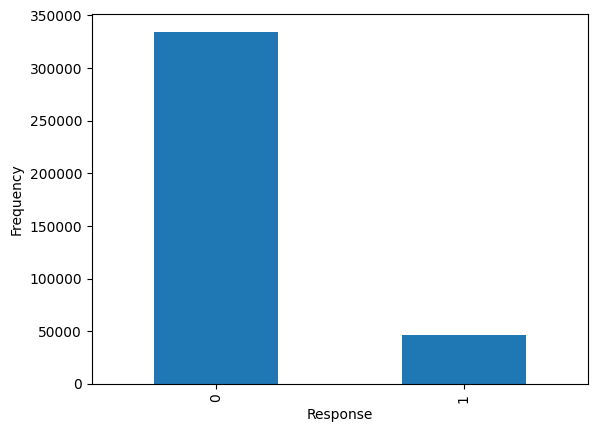

In [15]:
df_final["Response"].value_counts().plot(kind="bar", xlabel="Response", ylabel="Frequency")

In [16]:
#Create train test split 

from sklearn.model_selection import train_test_split
X = df_final.drop('Response', axis =1)
y = df_final.loc[:,['Response']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a Basline Model
How can we tell if our machine learning models are any good? To evaluate performance, we need to benchmark against something. In this case, we will create two baslines for our model. First, we can simply look at the average of our data for a numeric value. If we were going to predict the age, we could simply guess the average age for every candidate. 

On the other hand, for a categorical variable, we could simply guess 50/50 or the ratio of the categories in the data. In this case, the conversion data is imbalanced with 46710/ 334399 samples being of the non-stroke cateogry. That means that if we guessed that everyone in the sample didn't have a stroke, we would have a 86.0% success rate. Since this data is slightly imblanaced, this would not be a good baseline for our model.

One of the most important steps that we need to take is choosing a good evluation metric. The notebook that covers specific evaluation metrics can be located here: 

Accuracy does not make sense because of the imbalanced nature of the data. For this example we will use F1 score as our model evaluation metric.

- F1 is calculated by 2*((precision*recall)/(precision+recall))

- Instead of a simple accuracy calculation which would give us a baseline of 96.1%, F1 score gives us an undefined number since both the precision and recall of a model that only predicted negatives would equal 0. 

- In this case, we want to use a simple basleline model like Naive Bayes to set our baseline based off of f1 score. You can use most models to create a baseline, but I like Naive bayes because it is quick and doesn't require much parameter tuning. (Full breakdown of Naieve Bayes in or Algorithms Course)

In [17]:
#import cross validation score
from sklearn.model_selection import cross_val_score

#import Naive Bayes Classifier 
from sklearn.naive_bayes import GaussianNB

#run cv for NB classifier
from sklearn.metrics import classification_report

In [18]:
#create classifier object
nb = GaussianNB()



In [19]:
model_acc = cross_val_score(nb, X_train, y_train, cv=3, scoring='accuracy')

/home/jagannath/MLProcess/ml_env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jagannath/MLProcess/ml_env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jagannath/MLProcess/ml_env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
print('nb_accuracy: ' +str(model_acc))


nb_accuracy: [0.74467535 0.74676413 0.7414113 ]


# Model Comparison & Selection 
After we have a baseline model to compare against, we want to evaluate how other models might perform on the same data. I like to experiment with other basic models with very little paramater tuning to see what performs well. This isn't an exact science and many people may do this step differently. After we set up the models, we can begin experimenting with parameter tuning. I find that model selection and parameter tuning is often an iterative process. For an analysis like this, trying different models, changing parameters, and experimenting with new engineered features is where I find myself spending most of my time working. 

In this section we will try:
- Logistic regression
- Decision Tree
- K Nearest Neighbors (KNN)

In [21]:
#Let's now experiment with a few different basic models 

## Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state =32)

dt_accuracy = cross_val_score(dt,X_train,y_train.values.ravel(), cv=3, scoring ='accuracy')


print('dt_accuracy: ' +str(dt_accuracy))


dt_accuracy: [0.82060365 0.82309812 0.82119764]


In [22]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=32, max_iter = 2000, class_weight = 'balanced')

lr_accuracy = cross_val_score(lr,X_train,y_train.values.ravel(), cv=3, scoring ='accuracy')


print('lr_accuracy: ' +str(lr_accuracy))


/home/jagannath/MLProcess/ml_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


lr_accuracy: [0.63642804 0.6404948  0.63610908]


/home/jagannath/MLProcess/ml_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Manual Parameter Tuning
Let's try to do some parameter tuning with a few of these models:

Let's start with K Nearest Neighbors,which has a few parameters we can adjust, one of them being the number of K. K is how many other datapoints it uses to make its classification. If k= 3 it uses it sees what the samples 3 closest neighbors is and classifies it as the most common one. If k = 5, it uses its 5 closest datapoints. Let's change the number of k and see if that changes our results. 

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

#Knn Model Comparison 

#here we will loop through and see which value of k performs the best. 

for i in range(1, 7,3):
    model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=i))
    
    knn_f1 = cross_val_score(model, X_train, y_train.values.ravel(), cv=3, scoring="f1")

    


### What we find is that k=1 is the best estimator for this specific model. We go from 24.6% to 27.6%, a decent improvement! 
### We also realize that KNN may not be the best approach here because of the imbalanced data. 
### The larger the K is, the more of the majority class will automatically be included.

# Randomized Parameter Tuning
Since KNN may not be the best choice, let's explore the deicision tree. Decision trees have a lot more features we can tune. We can tweak the following:
- criterion {gini, entropy, log loss}
- splitter {best, random}
- max depth {int, None}
- min_samples_split {int, None}
- min_samples_leave {int, None}
- min_weight_fraction_leaf {float}
- max_features {int, auto, sqrt, log2, None}
- max_leaf_nodes {int, None}
- min_impurity_decrease {float}
- class_weight {dict, balanced, None}
- ccp_alpha {float}

There are a lot of parameters to tune! If there are just 2 options for each one that would be 2^11, which is 2048 total configurations. In theory, there are infinate numbers of paramater configurations. How do we even get close to finding the best one? 

The answer here is randomized search. We through in all the parameters that we are interested in searching, and the model will randomly select a subset and return the one that produces the best results. 

Still, let's manually select a few paramaters we want to evaluate on and then use randomized search:
- criterion
- split strategy
- max depth
- min_samples_split
- max features

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

df = DecisionTreeClassifier(random_state=42)

features = {'criterion': ['gini','entropy'],
            'splitter': ['best','random'],
           'max_depth': [2,5,10,20,40,None],
           'min_samples_split': [2,5,10,15],
           'max_features': ['auto','sqrt','log2',None]}


rs_dt = RandomizedSearchCV(estimator=dt, param_distributions=features, n_iter=100, cv = 3, random_state=42, scoring="f1")

rs_dt.fit(X_train, y_train)

/home/jagannath/MLProcess/ml_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
81 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
81 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jagannath/MLProcess/ml_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jagannath/MLProcess/ml_env/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/jagannath/MLProcess/ml_env/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    valida

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=32),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 5, 10, 20, 40, None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='f1')

In [26]:
print('best stcore = ' + str(rs_dt.best_score_))
print('best params = ' + str(rs_dt.best_params_))

best stcore = 0.2792733988805109
best params = {'splitter': 'random', 'min_samples_split': 2, 'max_features': None, 'max_depth': 40, 'criterion': 'entropy'}


# GridsearchCV (Exhaustive Parameter Tuning)
With this we have improved our model f1 score from **27.6% to 27.9%**. This is a decent increase! We also narrowed down some of the features that produced good results. We may want to try a more exhaustive search this time. Gridsearch goes through all of the possible combinations within an range and returns the best outcome. 

This time, let's do an exhaustive search of a smaller number of features and see if we can improve our results even more. 

In [27]:
from sklearn.model_selection import GridSearchCV


features_gs = {'criterion': ['entropy'],
            'splitter': ['random'],
           'max_depth': np.arange(30,50,1), #getting more precise within range
           'min_samples_split': [2,3,4,5,6,7,8,9],
           'max_features': [None]}

gs_dt = GridSearchCV(estimator = dt, param_grid =features_gs, cv = 3, scoring ='f1') #we don't need random state because there isn't randomization like before

gs_dt.fit(X_train,y_train)

/home/jagannath/MLProcess/ml_env/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=32),
             param_grid={'criterion': ['entropy'],
                         'max_depth': array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49]),
                         'max_features': [None],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['random']},
             scoring='f1')

In [28]:
print('best stcore = ' + str(gs_dt.best_score_))
print('best params = ' + str(gs_dt.best_params_))

#looks like we can  do a little better with this gridsearch! 

best stcore = 0.2792733988805109
best params = {'criterion': 'entropy', 'max_depth': np.int64(40), 'max_features': None, 'min_samples_split': 2, 'splitter': 'random'}


# Bayesian Optimization
I wonnder if we can do better than the funnel approach that we took with random search and gridsearch. What if we used a slightly smarter algorithm to help evaluate our features. Maybe we could explore all of the variables from the previous examples and see if our model missed something. This is where Bayesian Optimization comes in. This is an iterative process where our model improves its understandings of the feature inputs as it goes. (Full breakdown in the video portion of the course)

Now let's try to use this with a larger feature set on the same classifier. This won't guarantee a better result as it still is not an exahustive search, but in theory it let's us cover ground in a more efficient way. 

# Selecting a Model
We still haven't been able to do better than our baseline. In most cases, we to tune multiple different models until we reach one that performs the best based on our evaluation criteria. We also want to use other considerations like training time, prediction time, prediction time or interperetability to select selct the best model for our use case. 

Since we have one tuned model, lets see if we can improve it by combining it with a few of the other models we have used. This process is called ensembling. In the case of classification, we often use a popular vote metric to select the best model. 

Let's see if an ensemble model of these three classifiers outperforms our baseline model. 

In [30]:
from sklearn.ensemble import VotingClassifier


dt_voting = DecisionTreeClassifier(**{'criterion':"entropy", "max_depth": 44, "max_features": None, "min_samples_split":2, "splitter":'random'}) # ** allows you to pass in parameters as dict
knn_voting = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=1))
lr_voting = LogisticRegression(random_state=32, max_iter = 2000, class_weight = 'balanced')



In [32]:
ens = VotingClassifier(estimators = [('dt', dt_voting), ('knn', knn_voting), ('lr',lr_voting)], voting = 'hard')
ens

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=44,
                                                     splitter='random')),
                             ('knn',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('kneighborsclassifier',
                                               KNeighborsClassifier(n_neighbors=1))])),
                             ('lr',
                              LogisticRegression(class_weight='balanced',
                                                 max_iter=2000,
                                                 random_state=32))])

In [33]:
voting_accuracy = cross_val_score(ens,X_train,y_train.values.ravel(), cv=3, scoring ='accuracy')

print('voting_accuracy: ' +str(voting_accuracy))


/home/jagannath/MLProcess/ml_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jagannath/MLProcess/ml_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

voting_accuracy: [0.79656119 0.80201293 0.7985156 ]


# Stacked classifier 
In the case of the voting classifer, we didn't get better performance than our baseline model. Let's now try another type of ensembling called stacking. With stacking, we use the outputs of each of our individual models as features into a new model. In this case, where we have a decision tree, a naive baayes classifier, and a svc classifier, these will be the three features that a new model predicts on. 

Let's try running these three through a Naive Bayes Classifier and see what the results look like. 

# Ensemble Models
The last main type of ensemble approach that we see is one that is designed that way algorithmically. Typically, random forest or gradient boosted models have ensembling built into their implementation. Let's explor random forest and see how this approach works for our data. (We have a breakdown of the main ensembling techniques in our full course on algorithms). These algorithms leverage multiple decision trees to either vote or give pass information on to subsequent models. 

In [34]:
from sklearn.ensemble import RandomForestClassifier

#first let's try a non-tuned implementation 
rf = RandomForestClassifier(random_state=42)

rf_accuracy = cross_val_score(rf,X_train,y_train.values.ravel(), cv=3, scoring ='accuracy')
print('rf_accuracy: ' +str(rf_accuracy))


rf_accuracy: [0.85270899 0.85548496 0.85238122]


In [35]:
from sklearn.metrics import f1_score

nb.fit(X_train,y_train.values.ravel())
ens.fit(X_train,y_train.values.ravel())
dt_voting.fit(X_train,y_train.values.ravel())

DecisionTreeClassifier(criterion='entropy', max_depth=44, splitter='random')

In [36]:
nb_pred = nb.predict(X_test)
ens_pred = ens.predict(X_test)
dt_pred = dt_voting.predict(X_test)

In [37]:
print('baseline score ' + str(f1_score(y_test,nb_pred)))
print('dt score ' + str(f1_score(y_test,dt_pred)))
print('voting score ' + str(f1_score(y_test,ens_pred)))

baseline score 0.41692416439462787
dt score 0.2778555782972459
voting score 0.3332350339132999
